In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import resample
from IPython.display import Audio
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')

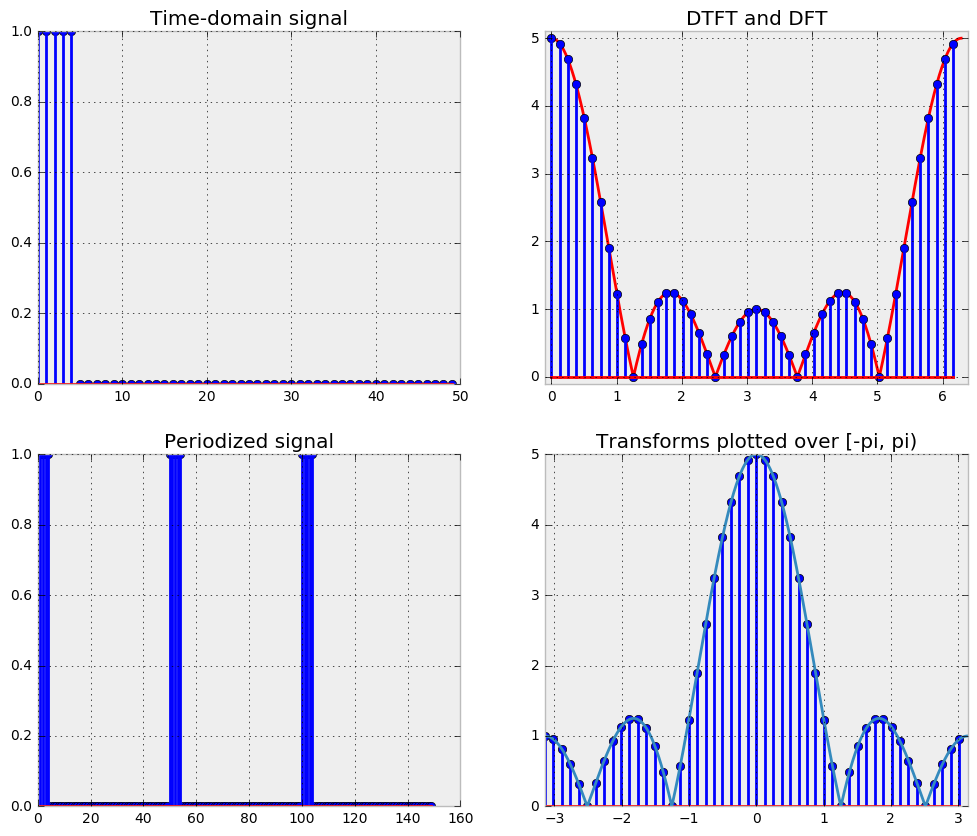

In [3]:
# DTFT and DFT of square waves with varying number of samples
#---------------------------------------------------------------------------

# number of ones
M = 5

# total length of the signal (for DFT)
N = 50

# time-domain index
n_idx = np.arange(N)

# frequency vector for the DTFT 
omega = np.linspace(0, 2*np.pi, 1e4)

# the rect wave
x = np.vstack((np.ones((M, 1)), np.zeros((N - M, 1))))

# simulate DTFT by doing DFT with a large number of samples
X_dtft = np.fft.fft(x, n=len(omega), axis=0)

# compute the DFT
X_dft = np.fft.fft(x, n=N, axis=0)


# PLOTTING
#---------------------------------------------------------------------------

fig = plt.figure(figsize=(12, 10))

# original signal
#---------------------------------------------------------------------------

ax = fig.add_subplot(221)
plt.stem(x)
plt.title('Time-domain signal')

# transforms
#---------------------------------------------------------------------------

ax = fig.add_subplot(222)
plt.plot(omega, np.abs(X_dtft), 'r')

# note the scaling of the frequency axis
plt.stem(2*np.pi/N * n_idx, np.abs(X_dft))

plt.xlim(-0.1, 2*np.pi + 0.1)
plt.ylim(-0.1, M+0.1)
plt.title('DTFT and DFT')


# periodized signal
#---------------------------------------------------------------------------

ax = fig.add_subplot(223)
plt.stem(np.vstack((x, x, x)))
plt.title('Periodized signal')


# transforms plotted from -pi to pi
#---------------------------------------------------------------------------

ax = fig.add_subplot(224)

if N % 2 == 0:
    shift = N / 2
else:
    shift = (N - 1) / 2
        
plt.stem(2*np.pi/N * (n_idx - shift), np.fft.fftshift(np.abs(X_dft)))
plt.plot(omega - np.pi, np.fft.fftshift(np.abs(X_dtft)))
_ = plt.xlim(-np.pi, np.pi)
plt.title('Transforms plotted over [-pi, pi)')

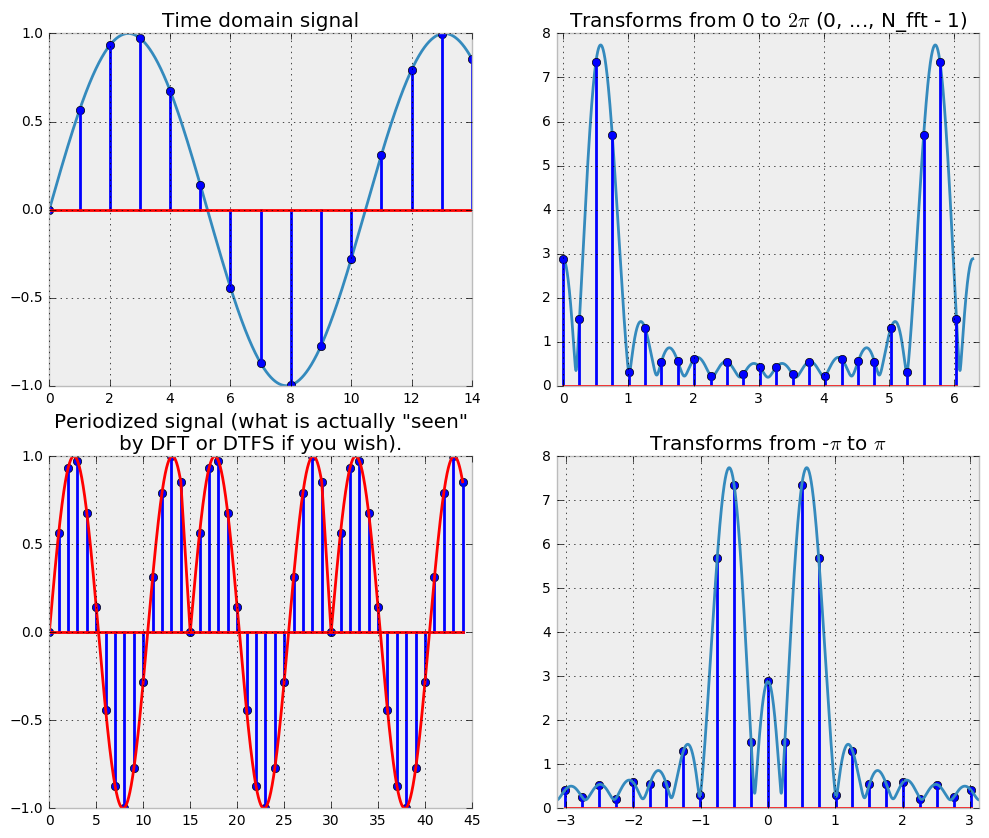

In [18]:
# DTFT and DFT of windowed sinusoids
#---------------------------------------------------------------------------

# frequency
omega0 = 0.6

# length of the window (number of sinusoid samples)
N = 15

# total length of the signal fed into DFT; zero-padding is by N_fft - N
N_fft = 25

# discrete time index
n_idx = np.arange(N)

# DFT frequency index
k_idx = np.arange(N_fft)

# just for plotting, so that we can which sinusoid we're sampling
t = np.linspace(0, N-1, 1e4)

# discrete signal
x = np.sin(omega0*n_idx)

# continuous signal we're sampling
x_c = np.sin(omega0*t)


# Uncomment to study the effect of window length and zero-padding
# on the ability to resolve two sinusoids with similar frequencies
# ------------------------------------------------------------------
# x = np.sin(omega0*n_idx) + np.sin(omega0*1.1*n_idx)
# x_c = np.sin(omega0*t) + np.sin(omega0*1.1*t)
# ------------------------------------------------------------------


# simulate DTFT by a huge number of samples
omega = np.linspace(0, 2*np.pi, 1e4)

X_dtft = np.fft.fft(x, n=len(omega), axis=0)
X_dft = np.fft.fft(x, n=N_fft, axis=0)

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(221)
plt.plot(t, x_c)
plt.stem(n_idx, x)
plt.title('Time domain signal')

ax = fig.add_subplot(222)
plt.plot(omega, np.abs(X_dtft))
plt.stem(2*np.pi/N_fft * k_idx, np.abs(X_dft))
plt.title('Transforms from 0 to $2\pi$ (0, ..., N_fft - 1)')

plt.xlim(-0.1, 2*np.pi + 0.1)
ax = fig.add_subplot(223)
plt.stem(np.hstack((n_idx, n_idx+N, n_idx+2*N)), np.hstack((x, x, x)))
plt.plot(np.hstack((t, t+N, t+2*N)), np.hstack((x_c, x_c, x_c)), 'r')
plt.title('Periodized signal (what is actually "seen"\nby DFT or DTFS if you wish).')

ax = fig.add_subplot(224)

if N % 2 == 0:
    shift = N_fft / 2
else:
    shift = (N_fft - 1) / 2

plt.stem(2*np.pi/N_fft * (k_idx - shift), np.fft.fftshift(np.abs(X_dft)))
plt.plot(omega - np.pi, np.fft.fftshift(np.abs(X_dtft)))
_ = plt.xlim(-np.pi, np.pi)
plt.title('Transforms from -$\pi$ to $\pi$')

